<a href="https://colab.research.google.com/github/ddfulaa/AlgorithmsUN2020II/blob/master/QuadraticEquation/newtonfractalz2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

#Function 
def f(z):
    return z ** 2 -1  
#Derivative of f
def df(z):
    return 2*z 

def raices():
  return (1,-1)

#z_c_r :z coordinate real, z_c_i: z coordinate imaginary 
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """
    # Pixels array: We create 3 layers for RGB
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    eps = 1e-3 # max error allowed

    # Bounding roots
    raiz=raices()
    r1=raiz[0]
    r2=raiz[1]

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 10
    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)
            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    #Calculate the derivative of f
                    dz = df(z)

                    if dz == 0: #If derivative is zero, we cannot calculate the next iteration of Newton Rhapson Method
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, count*multcol, count*multcol)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (count*multcol, 255 - count*multcol, count*multcol)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels
func_name="Z^2-1"
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)='+func_name)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


#Implementation of Classic and Po Shen Loh ‘s methods for solving quadratic equations

In [2]:
import math
#Returns a 3-tuple who contains the two roots and if they are complex or not (root1,root2,complex?)
def Classic_qe_solver(a,b,c):
  if b**2 - 4*a*c>=0:
    return (-b/(2*a)+math.sqrt(b**2-4*a*c)/(2*a),-b/(2*a)-1*math.sqrt(b**2-4*a*c)/(2*a),False)
  else:
    return (complex(-b/(2*a),math.sqrt(4*a*c-b**2)/(2*a)),complex(-b/(2*a),-1*math.sqrt(4*a*c-b**2)/(2*a)),True)

#Returns a 3-tuple who contains the two roots and if they are complex or not (root1,root2,complex?)
def PoShenLoh_qe_solver(a,b,c):
  B=b/a
  C=c/a
  u2 = (B/2)**2 - C
  if u2>=0:
    return (-(B/2)+math.sqrt(u2),-(B/2)-math.sqrt(u2),False)
  else:
    return (complex(-(B/2),math.sqrt(-u2)),complex(-(B/2),-math.sqrt(-u2)),True)

def PlotQuadraticFunction(a,b,c,title_name):
  roots=PoShenLoh_qe_solver(a,b,c)
  vertex_x=-b/(2*a)
  vertex_y=a*vertex_x**2 + b*vertex_x + c
  if roots[2]: #we will print in a plot where the center is the vertex of quadratic function
    x_0=vertex_x-5
    x_1=vertex_x+5
  else:
    x_0=min(roots[0],roots[1])-1
    x_1=max(roots[0],roots[1])+1
  x = np.linspace(x_0,x_1,100)
  fig, ax = plt.subplots()
  ax.plot(x,a*x**2+b*x+c)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(title_name)
  plt.xlabel('x')
  plt.ylabel('f(x)')

#1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)
* $x^2$
* $(x-1)^2$
* $x^2 – 1$
* $x^2 + 1$

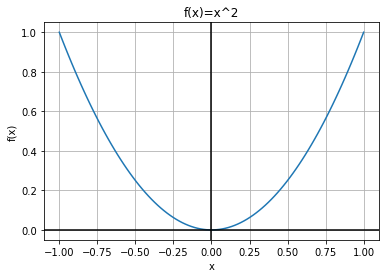

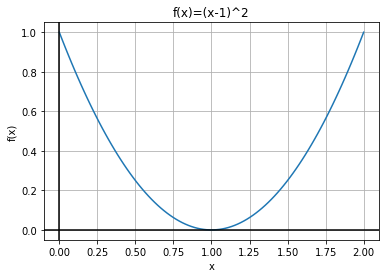

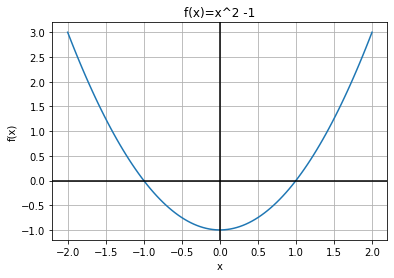

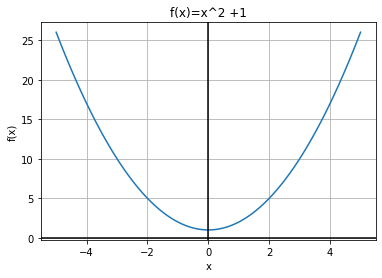

In [3]:
PlotQuadraticFunction(1,0,0,"f(x)=x^2")
PlotQuadraticFunction(1,-2,1,"f(x)=(x-1)^2")
PlotQuadraticFunction(1,0,-1,"f(x)=x^2 -1")
PlotQuadraticFunction(1,0,1,"f(x)=x^2 +1")



# **2** Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations
* x^2 = 0
* (x-1)^2 = 0
* x^2 – 1 =0
* x^2+ 1 =0

In [4]:
print("Po Shen Loh's Method Solution:\t",PoShenLoh_qe_solver(1,0,0)[0],"\t\t",PoShenLoh_qe_solver(1,0,0)[1])
print("Classic Method Solution:\t",Classic_qe_solver(1,0,0)[0],"\t\t",Classic_qe_solver(1,0,0)[1])
print("Po Shen Loh Method Solution:\t",PoShenLoh_qe_solver(1,-2,1)[0],"\t\t",PoShenLoh_qe_solver(1,-2,1)[1])
print("Classic Method Solution:\t",Classic_qe_solver(1,-2,1)[0],"\t\t",Classic_qe_solver(1,-2,1)[1])
print("Po Shen Loh's Method Solution:\t",PoShenLoh_qe_solver(1,0,-1)[0],"\t\t",PoShenLoh_qe_solver(1,0,-1)[1])
print("Classic Method Solution:\t",Classic_qe_solver(1,0,-1)[0],"\t\t",Classic_qe_solver(1,0,-1)[1])
print("Po Shen Loh's Method Solution:\t",PoShenLoh_qe_solver(1,0,1)[0],"\t",PoShenLoh_qe_solver(1,0,1)[1])
print("Classic Method Solution:\t",Classic_qe_solver(1,0,1)[0],"\t\t",Classic_qe_solver(1,0,1)[1])

Po Shen Loh's Method Solution:	 0.0 		 -0.0
Classic Method Solution:	 0.0 		 0.0
Po Shen Loh Method Solution:	 1.0 		 1.0
Classic Method Solution:	 1.0 		 1.0
Po Shen Loh's Method Solution:	 1.0 		 -1.0
Classic Method Solution:	 1.0 		 -1.0
Po Shen Loh's Method Solution:	 (-0+1j) 	 (-0-1j)
Classic Method Solution:	 1j 		 -1j


# 3. Plot the newton fractals for the corresponding complex quadratic polynomials
* $z^2$
* $(z-1)^2$
* $z^2 – 1$
* $z^2+ 1$

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


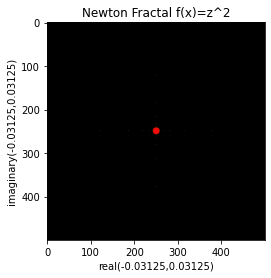

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


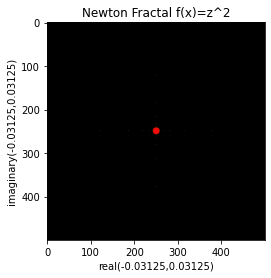

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


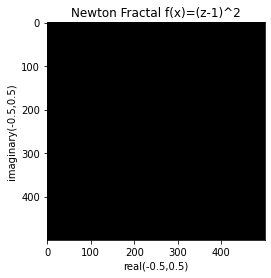

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


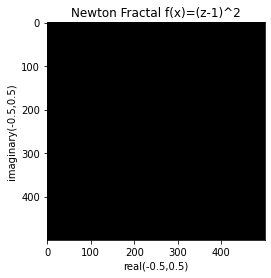

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


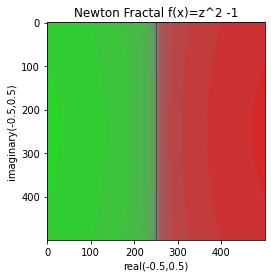

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


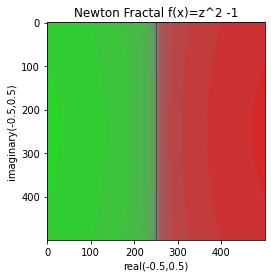

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


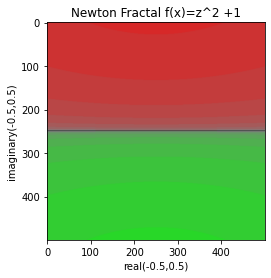

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


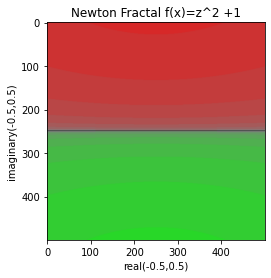

In [5]:
#Redefine functions for z^2
def f(z):
    return z ** 2 
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,0)
func_name="z^2"
display1(zoom=1/16)

#Redefine functions for z^2
def f(z):
    return z ** 2 
def df(z):
    return 2*z 
def raices():
  return Classic_qe_solver(1,0,0)
func_name="z^2"
display1(zoom=1/16)

#Redefine functions for (z-1)^2
def f(z):
    return (z-1) ** 2 
def df(z):
    return 2*(z-1)
def raices():
  return PoShenLoh_qe_solver(1,-2,1)
func_name="(z-1)^2"
display1(zoom=1)

#Redefine functions for (z-1)^2
def f(z):
    return (z-1) ** 2 
def df(z):
    return 2*(z-1)
def raices():
  return Classic_qe_solver(1,-2,1)
func_name="(z-1)^2"
display1(zoom=1)

#Redefine functions for z^2 -1
def f(z):
    return z ** 2 -1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,-1)
func_name="z^2 -1"
display1(zoom=1)

#Redefine functions for z^2 -1
def f(z):
    return z ** 2 -1
def df(z):
    return 2*z 
def raices():
  return Classic_qe_solver(1,0,-1)
func_name="z^2 -1"
display1(zoom=1)


#Redefine functions for z^2 +1
def f(z):
    return z ** 2 +1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,1)
func_name="z^2 +1"
display1(zoom=1)

#Redefine functions for z^2 +1
def f(z):
    return z ** 2 +1
def df(z):
    return 2*z 
def raices():
  return Classic_qe_solver(1,0,1)
func_name="z^2 +1"
display1(zoom=1)

#4 Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

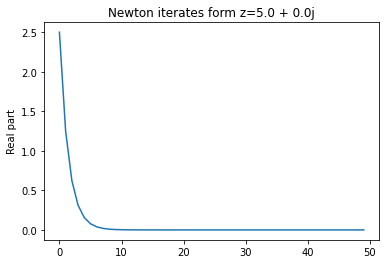

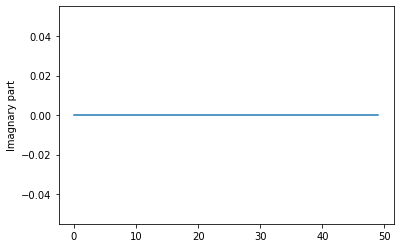

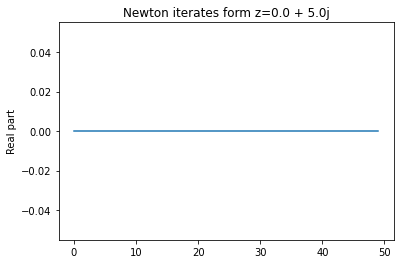

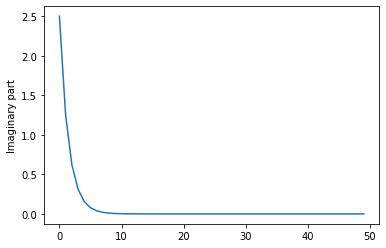

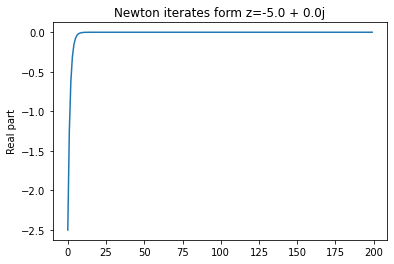

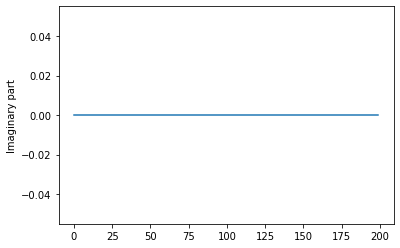

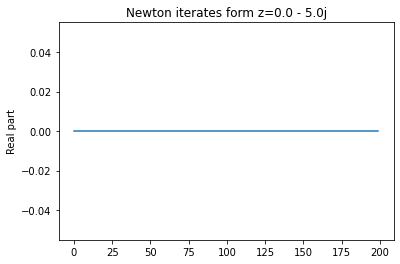

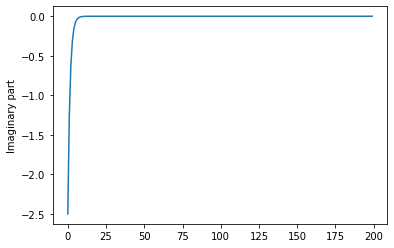

In [6]:
#Redefine functions for z^2
def f(z):
    return z ** 2 
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,0)
z=5.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

z=0.0 + 5.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-5.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 - 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

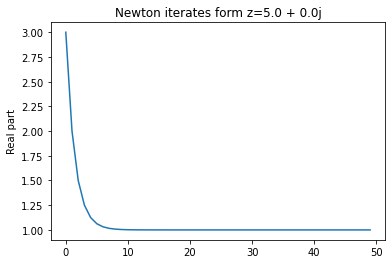

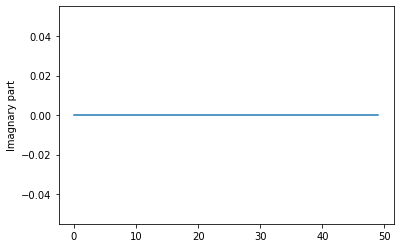

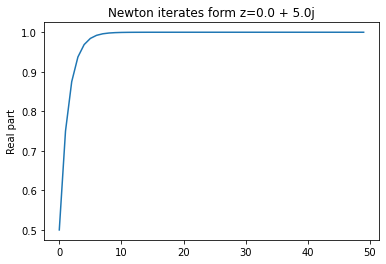

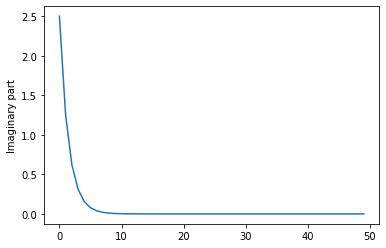

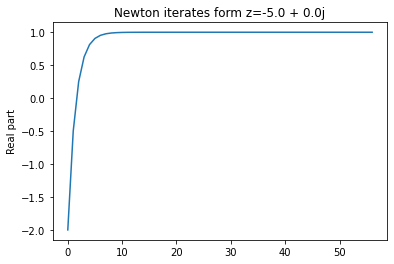

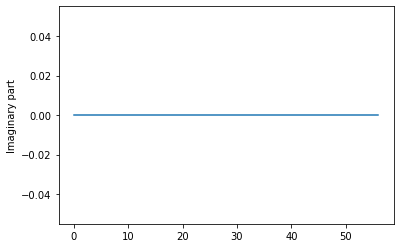

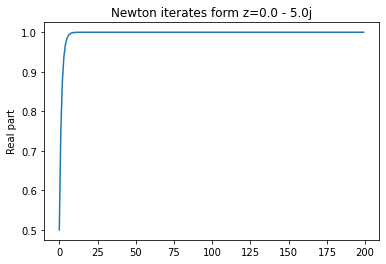

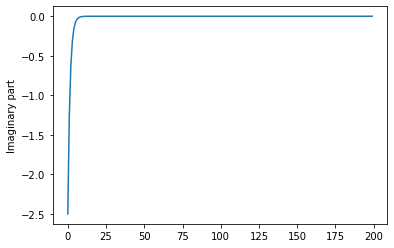

In [8]:
#Redefine functions for (z-1)^2
def f(z):
    return (z-1) ** 2 
def df(z):
    return 2*(z-1)
def raices():
  return PoShenLoh_qe_solver(1,-2,1)
z=5.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

z=0.0 + 5.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-5.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 - 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

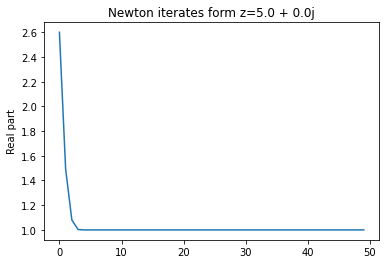

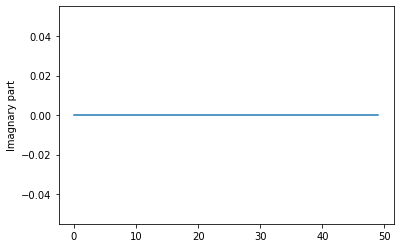

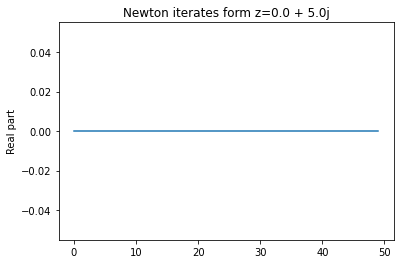

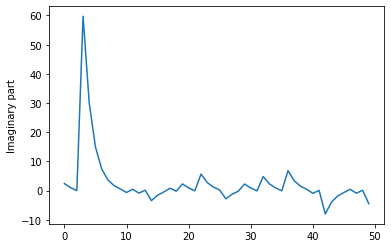

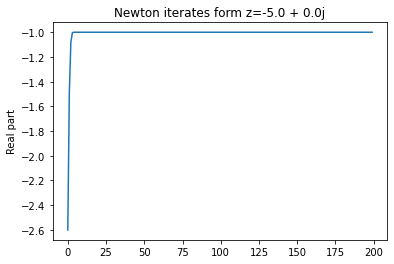

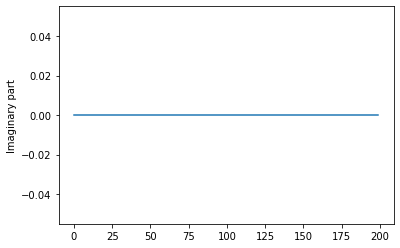

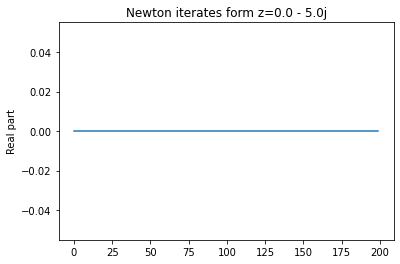

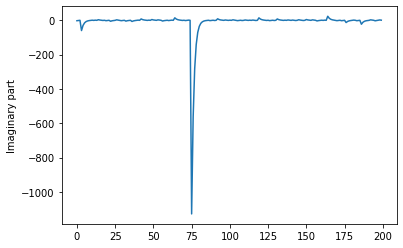

In [9]:
#Redefine functions for z^2 -1
def f(z):
    return z ** 2 -1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,-1)
z=5.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

z=0.0 + 5.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-5.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 - 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

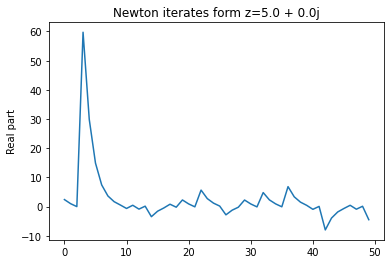

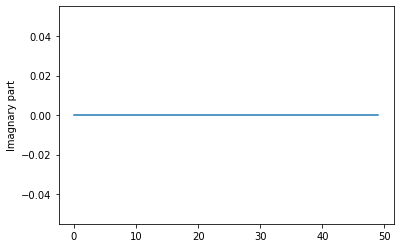

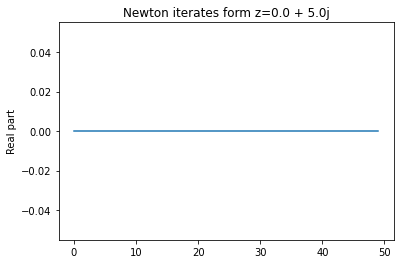

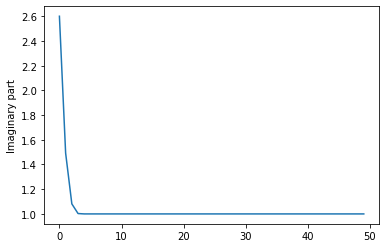

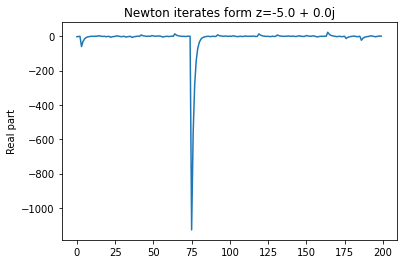

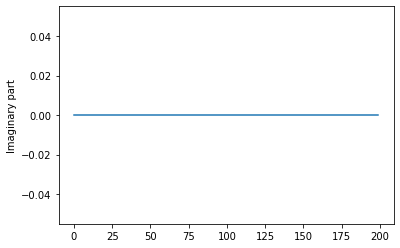

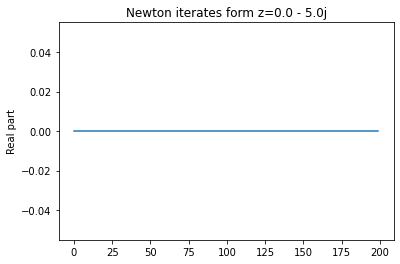

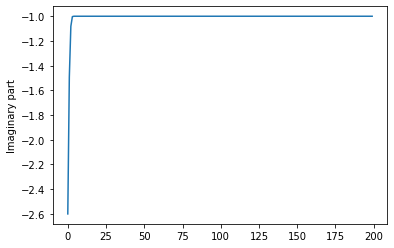

In [10]:
#Redefine functions for z^2 +1
def f(z):
    return z ** 2 +1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,1)
z=5.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

z=0.0 + 5.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-5.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-5.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 - 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 5.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#5 Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

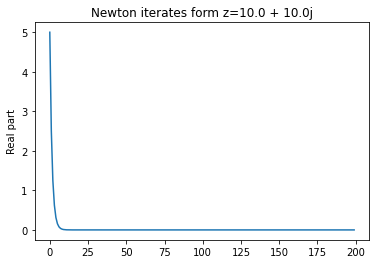

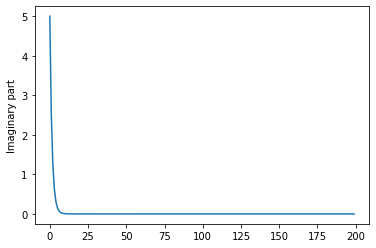

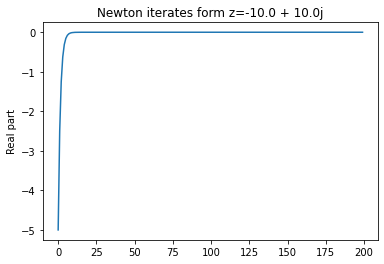

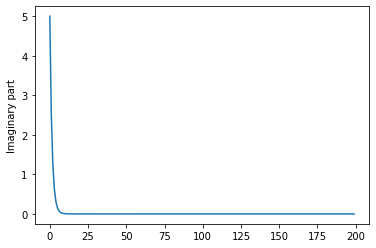

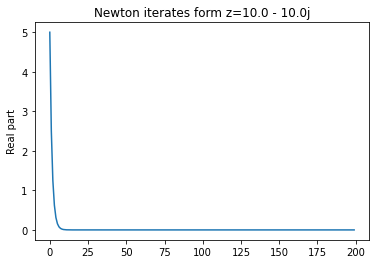

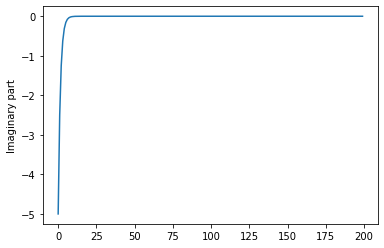

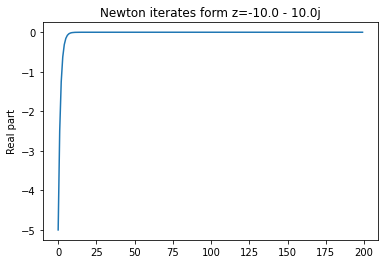

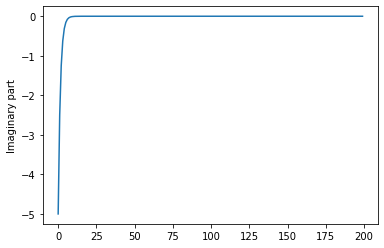

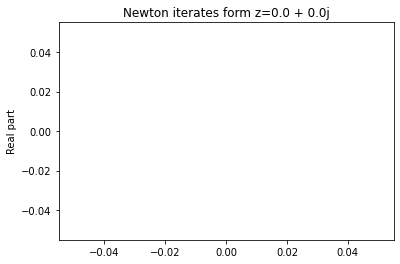

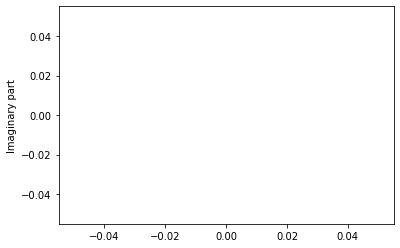

In [12]:
#Redefine functions for z^2
def f(z):
    return z ** 2 
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,0)
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

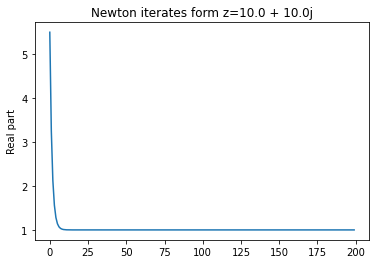

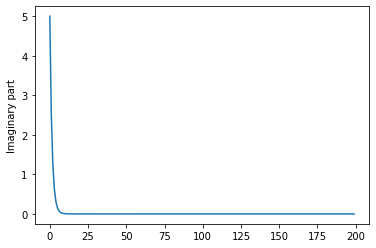

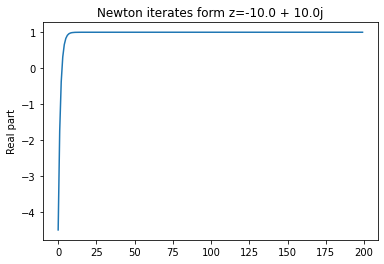

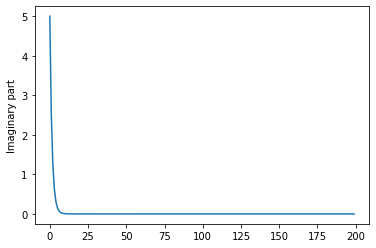

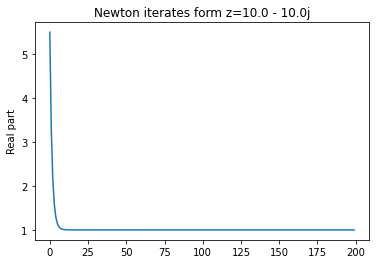

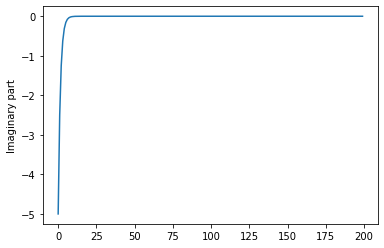

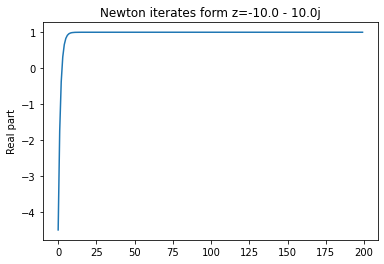

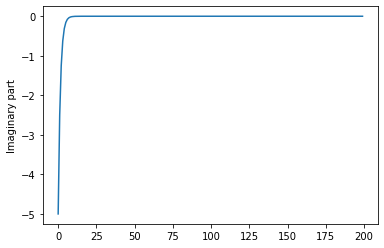

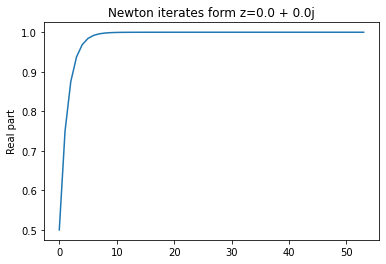

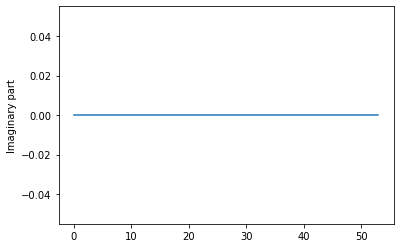

In [15]:
#Redefine functions for (z-1)^2
def f(z):
    return (z-1) ** 2 
def df(z):
    return 2*(z-1)
def raices():
  return PoShenLoh_qe_solver(1,-2,1)
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

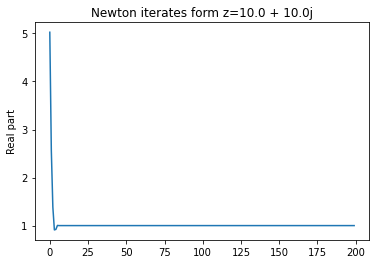

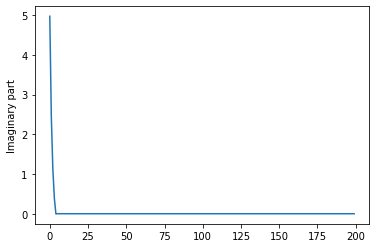

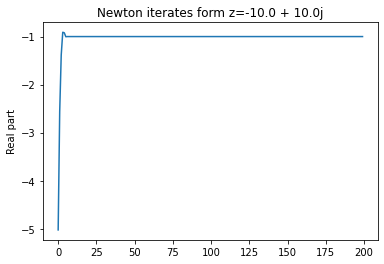

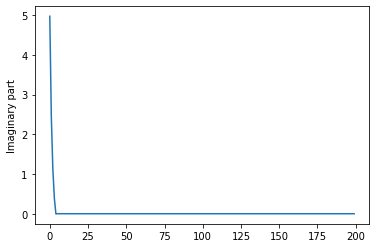

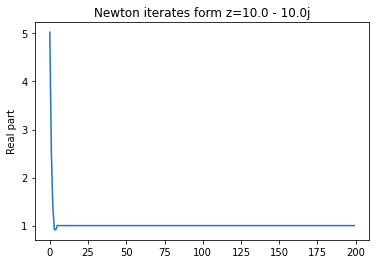

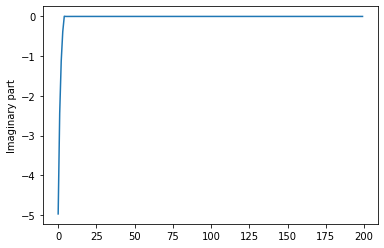

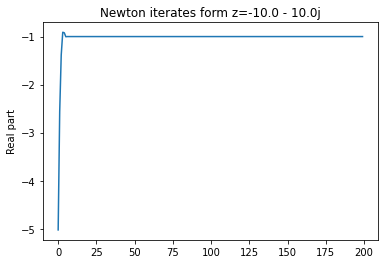

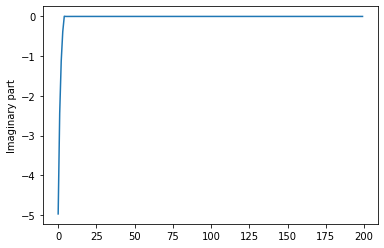

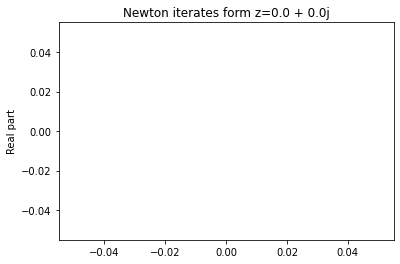

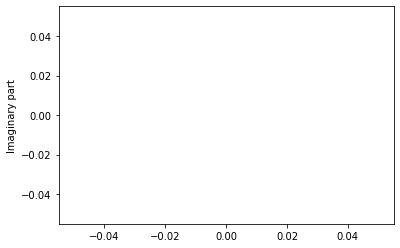

In [17]:
#Redefine functions for z^2 -1
def f(z):
    return z ** 2 -1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,-1)
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

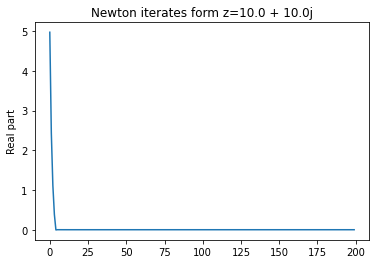

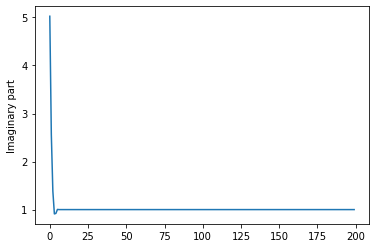

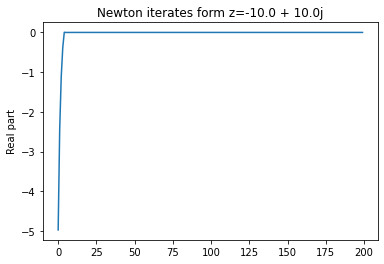

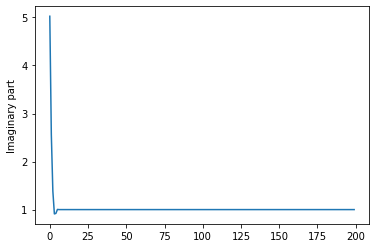

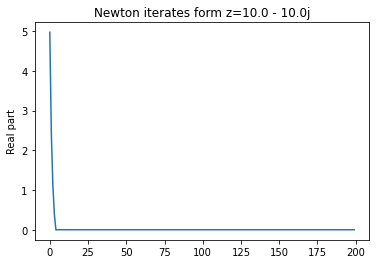

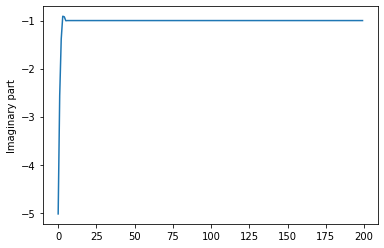

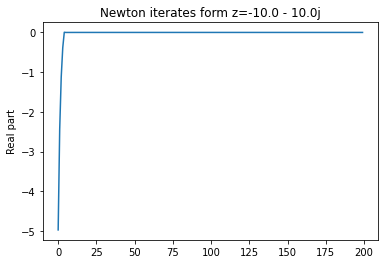

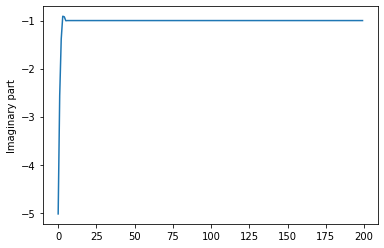

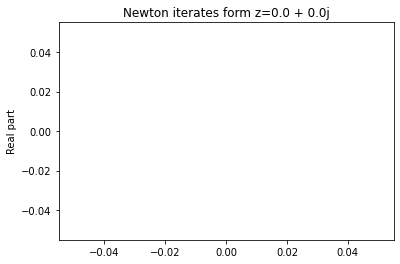

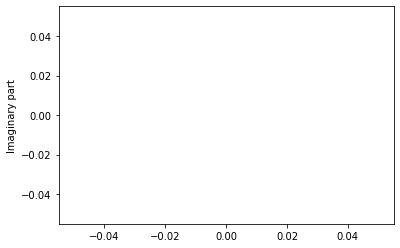

In [18]:
#Redefine functions for z^2 +1
def f(z):
    return z ** 2 +1
def df(z):
    return 2*z 
def raices():
  return PoShenLoh_qe_solver(1,0,1)
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  if dz==0:
    break
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


## **References**
### Modification to plot a square in the complex plane with center in $(z_{c_r},z_{c_i})$ and of size $zw \times zh$

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)